# MOVIE RATING PREDICTION PROJECT

## Step 1: Import libraries

In [58]:
# Importing Necessary Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#
## Step 2: Data Loading and Preprocessing

In [59]:
# Load the dataset
data = pd.read_csv("Tasks' Dataset/IMDb Movies India.csv", encoding='unicode_escape')

In [60]:
# Dropping null values and duplicates
data = data.dropna().drop_duplicates()

In [61]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [62]:
# Display descriptive statistics for numerical columns
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


#
## Step 3: Data preprocessing

In [63]:
if data['Year'].dtype != 'int':
    data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True).astype(int)
if data['Duration'].dtype != 'int':
    data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''))
if data['Votes'].dtype != 'int':
    data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''))

In [64]:
# Handle Genre column
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])

In [65]:
# Print head of the data
print("Original Head of the Data : \n")
print(data.head())
print("\n ----- \n")

Original Head of the Data : 

                                 Name  Year  Duration    Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019       109    Drama     7.0      8   
3                             #Yaaram  2019       110   Comedy     4.4     35   
3                             #Yaaram  2019       110  Romance     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997       147   Comedy     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997       147    Drama     4.7    827   

        Director       Actor 1                 Actor 2          Actor 3  
1  Gaurav Bakshi  Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
3     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
5   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  

 ----- 



#
## Step 4:  Feature Engineering

In [66]:
data['Mean_of_genre_rating'] = data.groupby('Genre')['Rating'].transform('mean')
data['Mean_of_director_rating'] = data.groupby('Director')['Rating'].transform('mean')
data['Mean_of_actor1_rating'] = data.groupby('Actor 1')['Rating'].transform('mean')
data['Mean_of_actor2_rating'] = data.groupby('Actor 2')['Rating'].transform('mean')
data['Mean_of_actor3_rating'] = data.groupby('Actor 3')['Rating'].transform('mean')

data = data.drop('Name', axis=1)

#
## Step 5:  Data Visualization

### Histogram for Year

In [67]:
year = px.histogram(data, x='Year', histnorm='probability density', nbins=15)
year.update_traces(marker_color='#003f5c')
year.update_layout(width=800, height=400, title='Histogram for Year')
year.show()

### Line chart for Average Rating by Year for Genre

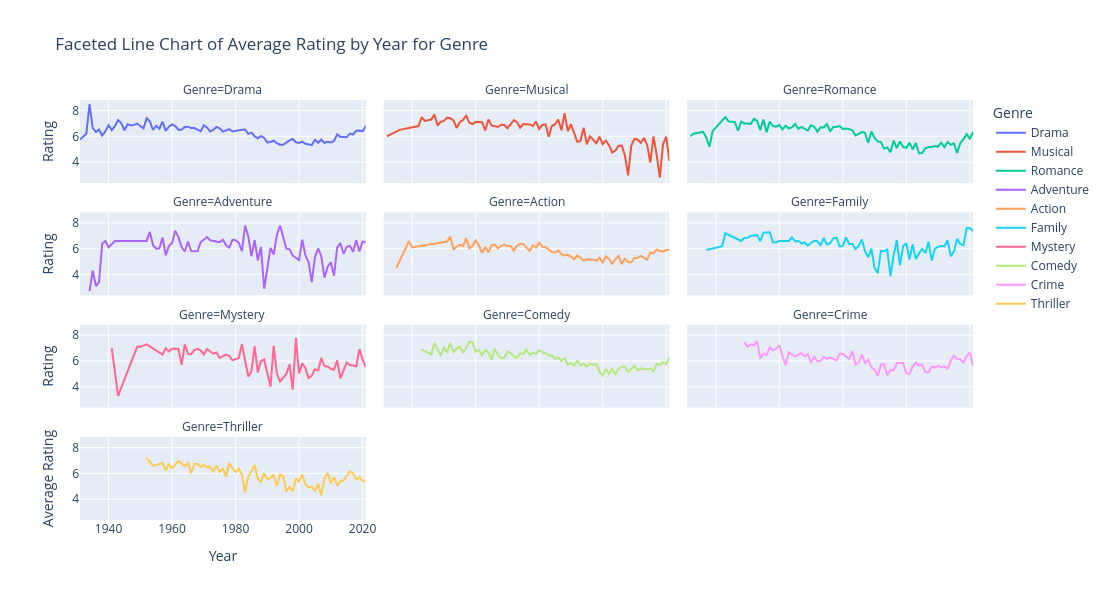

In [68]:
rate_avg_year = data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()
first_ten_data = data['Genre'].value_counts().head(10).index
filtered_data = rate_avg_year[rate_avg_year['Genre'].isin(first_ten_data)]
faceted_line_chart = px.line(filtered_data, x='Year', y='Rating', color='Genre', facet_col='Genre', facet_col_wrap=3,
                             title='Faceted Line Chart of Average Rating by Year for Genre')
faceted_line_chart.update_layout(width=900, height=600, xaxis_title='Year', yaxis_title='Average Rating')
faceted_line_chart.show()

### Rating Distribution

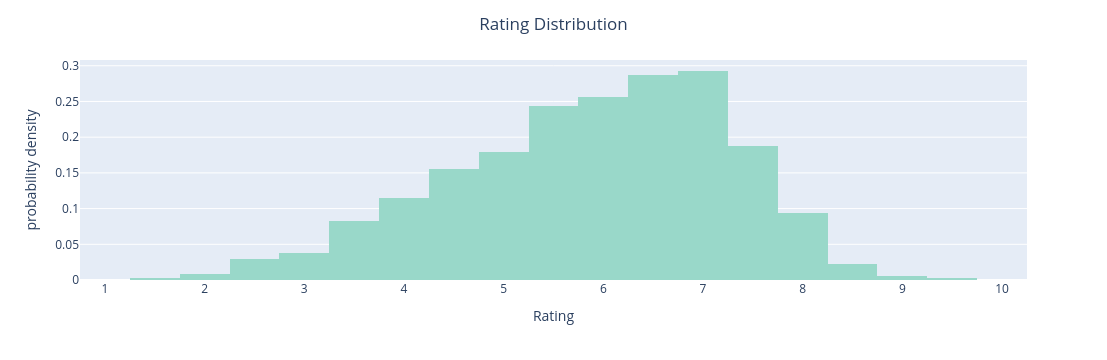

In [69]:
rating = px.histogram(data, x='Rating', histnorm='probability density', nbins=40)
rating.update_traces(marker_color='#99d8c9')
rating.update_layout(title="Rating Distribution", title_x=0.5)
rating.show()

#
## Step 4: Model Building

In [70]:
# Making input and output variables
input_x = data[['Year', 'Votes', 'Duration', 'Mean_of_genre_rating', 'Mean_of_director_rating', 
                'Mean_of_actor1_rating', 'Mean_of_actor2_rating', 'Mean_of_actor3_rating']]
output_y = data['Rating']

In [71]:
# Splitting data into training and testing part
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2, random_state=42)

In [72]:
# Building the model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

#
## Step 5: Model Evaluation

In [73]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

In [74]:
print(f'Mean Square Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Square Error: 44.65441653985704
Mean Absolute Error: 49.21902540765641
R2 Score: 76.41133663863862


#
## Step 6: Model Tuning

In [75]:
input_year = int(input("Enter Year Value: "))
input_votes = int(input("Enter Vote Value: "))
input_duration = int(input("Enter Duration Value: "))
input_mean_genre_rating = float(input("Enter Genre Mean Rating: "))
input_director = float(input("Enter Director encoded value: "))
input_actor1 = float(input("Enter Actor 1 encoded value: "))
input_actor2 = float(input("Enter Actor 2 encoded value: "))
input_actor3 = float(input("Enter Actor 3 encoded value: "))

test = pd.DataFrame({
    'Year': [input_year],
    'Votes': [input_votes],
    'Duration': [input_duration],
    'Mean_of_genre_rating': [input_mean_genre_rating],
    'Mean_of_director_rating': [input_director],
    'Mean_of_actor1_rating': [input_actor1],
    'Mean_of_actor2_rating': [input_actor2],
    'Mean_of_actor3_rating': [input_actor3]
})

prediction = model.predict(test)
print(f"Predicted Rating of the Movie: {prediction[0]}")

Enter Year Value:  2010
Enter Vote Value:  10000
Enter Duration Value:  120
Enter Genre Mean Rating:  7.5
Enter Director encoded value:  8.0
Enter Actor 1 encoded value:  7.8
Enter Actor 2 encoded value:  7.7
Enter Actor 3 encoded value:  7.6


Predicted Rating of the Movie: 8.397678867560614
